In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bali 2015 - 2022.csv to Bali 2015 - 2022.csv


In [ ]:
# Membaca dataset
df = pd.read_csv("Bali 2015 - 2022.csv")

In [ ]:
# Preprocessing dataset
df.columns = df.columns.str.strip()
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(by='datetime')
df.set_index('datetime', inplace=True)


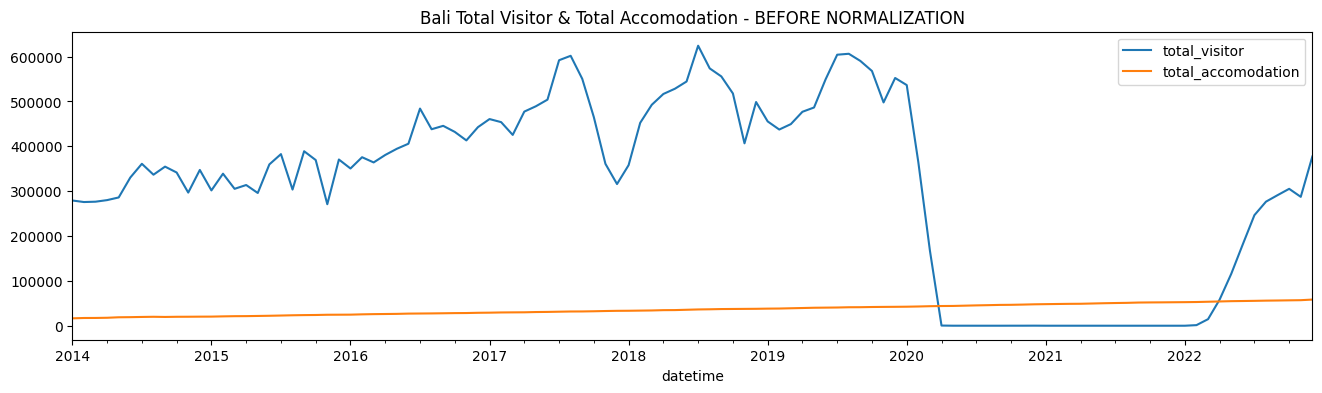

In [ ]:
df.plot(figsize=(16,4),legend=True)
plt.title('Bali Total Visitor & Total Accomodation - BEFORE NORMALIZATION')
plt.show()

In [ ]:
# Normalisasi kolom numerik
scaler = MinMaxScaler()
df[['total_visitor', 'total_accomodation']] = scaler.fit_transform(df[['total_visitor', 'total_accomodation']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2014-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_visitor       108 non-null    float64
 1   total_accomodation  108 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [ ]:
#Memakai fitur yang ada
features = df[['total_visitor', 'total_accomodation']].values

In [ ]:
#Bentuk data input untuk LSTM
X = []
for i in range(len(features)):
    X.append(features[i])
X = np.array(X)



In [ ]:
# Pembagian data skenario 1 80-20
X_train_80, X_test_20 = train_test_split(X, test_size=0.2, shuffle=False)

In [ ]:
# Menampilkan ukuran data training dan testing untuk setiap skenario
print("Ukuran Data Training (80%):", X_train_80.shape)
print("Ukuran Data Testing (20%):", X_test_20.shape)

Ukuran Data Training (80%): (86, 2)
Ukuran Data Testing (20%): (22, 2)


In [ ]:
# Pembagian data skenario 2 70-30
X_train_70, X_test_30 = train_test_split(X, test_size=0.3, shuffle=False)

# Menampilkan ukuran data training dan testing untuk setiap skenario
print("Ukuran Data Training (70%):", X_train_70.shape)
print("Ukuran Data Testing (30%):", X_test_30.shape)

Ukuran Data Training (70%): (75, 2)
Ukuran Data Testing (30%): (33, 2)


In [ ]:
# Pembagian data skenario 2 60-40
X_train_60, X_test_40 = train_test_split(X, test_size=0.4, shuffle=False)

# Menampilkan ukuran data training dan testing untuk setiap skenario
print("Ukuran Data Training (60%):", X_train_60.shape)
print("Ukuran Data Testing (40%):", X_test_40.shape)

Ukuran Data Training (60%): (64, 2)
Ukuran Data Testing (40%): (44, 2)


In [ ]:
# Fungsi untuk membuat input LSTM
def create_lstm_input(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Definisi jumlah time steps
time_steps = 12

In [ ]:
# Reshape data input untuk LSTM (Scenario 1)
X_train_lstm_80, y_train_lstm_80 = create_lstm_input(X_train_80, time_steps)
X_test_lstm_20, y_test_lstm_20 = create_lstm_input(X_test_20, time_steps)

# Reshape data input untuk LSTM (Scenario 2)
X_train_lstm_70, y_train_lstm_70 = create_lstm_input(X_train_70, time_steps)
X_test_lstm_30, y_test_lstm_30 = create_lstm_input(X_test_30, time_steps)

# Reshape data input untuk LSTM (Scenario 3)
X_train_lstm_60, y_train_lstm_60 = create_lstm_input(X_train_60, time_steps)
X_test_lstm_40, y_test_lstm_40 = create_lstm_input(X_test_40, time_steps)


In [ ]:
# Reshape data untuk LSTM (setiap skenario)
# Scenario 1
X_train_lstm_80 = np.reshape(X_train_lstm_80, (X_train_lstm_80.shape[0], X_train_lstm_80.shape[1], 2))
X_test_lstm_20 = np.reshape(X_test_lstm_20, (X_test_lstm_20.shape[0], X_test_lstm_20.shape[1], 2))
# Scenario 2
X_train_lstm_70 = np.reshape(X_train_lstm_70, (X_train_lstm_70.shape[0], X_train_lstm_70.shape[1], 2))
X_test_lstm_30 = np.reshape(X_test_lstm_30, (X_test_lstm_30.shape[0], X_test_lstm_30.shape[1], 2))
# Scenario 3
X_train_lstm_60 = np.reshape(X_train_lstm_60, (X_train_lstm_60.shape[0], X_train_lstm_60.shape[1], 2))
X_test_lstm_40 = np.reshape(X_test_lstm_40, (X_test_lstm_40.shape[0], X_test_lstm_40.shape[1], 2))

In [ ]:
#Membuat model LSTM
def create_lstm_model(input_shape, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(32, input_shape=input_shape, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mae')
    return model

In [ ]:
# Scenario 1
input_shape = (X_train_lstm_80.shape[1], X_train_lstm_80.shape[2])

# Model Scenario 1 (80-20)
lstm_model_80 = create_lstm_model(input_shape)

# Scenario 2
input_shape = (X_train_lstm_70.shape[1], X_train_lstm_70.shape[2])

# Model Scenario 2 (70-30)
lstm_model_70 = create_lstm_model(input_shape)

# Scenario 3
input_shape = (X_train_lstm_60.shape[1], X_train_lstm_60.shape[2])

# Model Scenario 3 (60-40)
lstm_model_60 = create_lstm_model(input_shape)


In [ ]:
# Train the model
lstm_model_80.fit(X_train_lstm_80, y_train_lstm_80, epochs=50, batch_size=32, validation_data=(X_test_lstm_20, y_test_lstm_20))


Epoch 1/50
3/3 [==============================] - 2s 158ms/step - loss: 0.5796 - val_loss: 0.2764
Epoch 2/50
3/3 [==============================] - 0s 22ms/step - loss: 0.5435 - val_loss: 0.2609
Epoch 3/50
3/3 [==============================] - 0s 22ms/step - loss: 0.5092 - val_loss: 0.2514
Epoch 4/50
3/3 [==============================] - 0s 21ms/step - loss: 0.4729 - val_loss: 0.2403
Epoch 5/50
3/3 [==============================] - 0s 29ms/step - loss: 0.4359 - val_loss: 0.2287
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 0.4064 - val_loss: 0.2173
Epoch 7/50
3/3 [==============================] - 0s 30ms/step - loss: 0.3612 - val_loss: 0.2074
Epoch 8/50
3/3 [==============================] - 0s 23ms/step - loss: 0.3298 - val_loss: 0.1935
Epoch 9/50
3/3 [==============================] - 0s 21ms/step - loss: 0.2806 - val_loss: 0.1781
Epoch 10/50
3/3 [==============================] - 0s 22ms/step - loss: 0.2531 - val_loss: 0.1622
Epoch 11/50
3/3 [===========

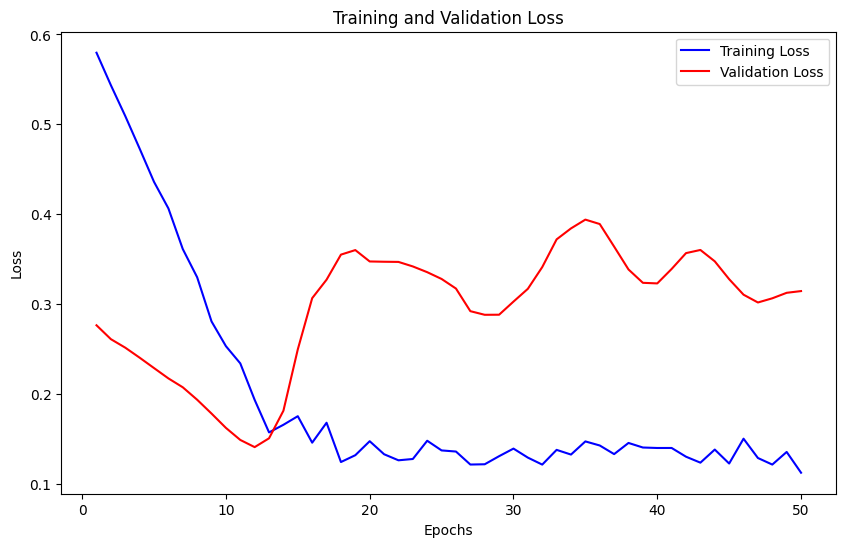

In [ ]:
# Plot training & validation loss values
lstm_80_history = lstm_model_80.history.history

# Extracting loss and validation loss values
lstm_80_loss = lstm_80_history['loss']
lstm_80_val_loss = lstm_80_history['val_loss']

epochs = range(1, len(lstm_80_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))

plt.plot(epochs, lstm_80_loss, 'b', label='Training Loss')
plt.plot(epochs, lstm_80_val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
train_loss_80 = lstm_model_80.evaluate(X_train_lstm_80, y_train_lstm_80, verbose=0)
test_loss_20 = lstm_model_80.evaluate(X_test_lstm_20, y_test_lstm_20, verbose=0)
print(f"Train Loss (Scenario 1): {train_loss_80}")
print(f"Test Loss (Scenario 1): {test_loss_20}")

Train Loss (Scenario 1): 0.10441666096448898
Test Loss (Scenario 1): 0.31441181898117065


In [ ]:
# Train the model sc2
lstm_model_70.fit(X_train_lstm_70, y_train_lstm_70, epochs=50, batch_size=32, validation_data=(X_test_lstm_30, y_test_lstm_30))


Epoch 1/50
2/2 [==============================] - 3s 428ms/step - loss: 0.7878 - val_loss: 0.1754
Epoch 2/50
2/2 [==============================] - 0s 52ms/step - loss: 0.7584 - val_loss: 0.1766
Epoch 3/50
2/2 [==============================] - 0s 60ms/step - loss: 0.7212 - val_loss: 0.1784
Epoch 4/50
2/2 [==============================] - 0s 51ms/step - loss: 0.6866 - val_loss: 0.1832
Epoch 5/50
2/2 [==============================] - 0s 51ms/step - loss: 0.6448 - val_loss: 0.1887
Epoch 6/50
2/2 [==============================] - 0s 55ms/step - loss: 0.5989 - val_loss: 0.1955
Epoch 7/50
2/2 [==============================] - 0s 53ms/step - loss: 0.5540 - val_loss: 0.2050
Epoch 8/50
2/2 [==============================] - 0s 60ms/step - loss: 0.5186 - val_loss: 0.2150
Epoch 9/50
2/2 [==============================] - 0s 55ms/step - loss: 0.4674 - val_loss: 0.2300
Epoch 10/50
2/2 [==============================] - 0s 51ms/step - loss: 0.4038 - val_loss: 0.2470
Epoch 11/50
2/2 [===========

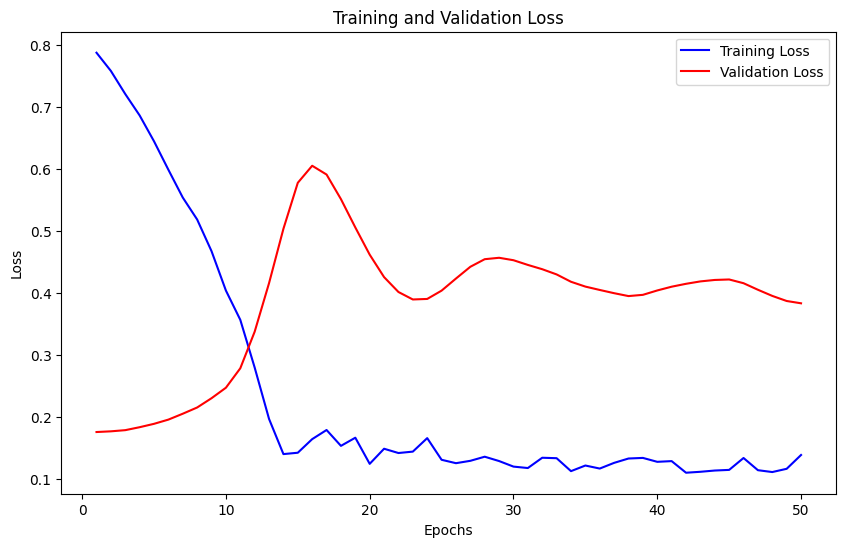

In [ ]:
# Plot training & validation loss values
lstm_70_history = lstm_model_70.history.history

# Extracting loss and validation loss values
lstm_70_loss = lstm_70_history['loss']
lstm_70_val_loss = lstm_70_history['val_loss']

epochs = range(1, len(lstm_70_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))

plt.plot(epochs, lstm_70_loss, 'b', label='Training Loss')
plt.plot(epochs, lstm_70_val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
train_loss_70 = lstm_model_70.evaluate(X_train_lstm_70, y_train_lstm_70, verbose=0)
test_loss_30 = lstm_model_70.evaluate(X_test_lstm_30, y_test_lstm_30, verbose=0)
print(f"Train Loss (Scenario 2): {train_loss_70}")
print(f"Test Loss (Scenario 2): {test_loss_30}")

Train Loss (Scenario 2): 0.10096119344234467
Test Loss (Scenario 2): 0.38326555490493774


In [ ]:
# Train the model
lstm_model_60.fit(X_train_lstm_60, y_train_lstm_60, epochs=50, batch_size=32, validation_data=(X_test_lstm_40, y_test_lstm_40))


Epoch 1/50
2/2 [==============================] - 2s 271ms/step - loss: 0.7685 - val_loss: 0.1966
Epoch 2/50
2/2 [==============================] - 0s 36ms/step - loss: 0.7541 - val_loss: 0.1806
Epoch 3/50
2/2 [==============================] - 0s 41ms/step - loss: 0.7322 - val_loss: 0.1653
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.7192 - val_loss: 0.1502
Epoch 5/50
2/2 [==============================] - 0s 33ms/step - loss: 0.6962 - val_loss: 0.1355
Epoch 6/50
2/2 [==============================] - 0s 38ms/step - loss: 0.6736 - val_loss: 0.1219
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 0.6592 - val_loss: 0.1104
Epoch 8/50
2/2 [==============================] - 0s 36ms/step - loss: 0.6451 - val_loss: 0.1088
Epoch 9/50
2/2 [==============================] - 0s 35ms/step - loss: 0.6260 - val_loss: 0.1136
Epoch 10/50
2/2 [==============================] - 0s 37ms/step - loss: 0.6146 - val_loss: 0.1190
Epoch 11/50
2/2 [===========

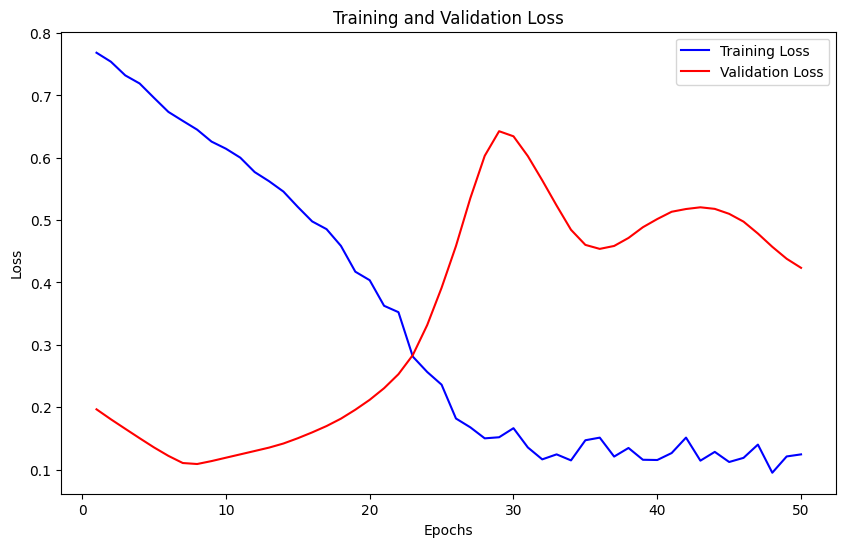

In [ ]:
# Plot training & validation loss values
lstm_60_history = lstm_model_60.history.history

# Extracting loss and validation loss values
lstm_60_loss = lstm_60_history['loss']
lstm_60_val_loss = lstm_60_history['val_loss']

epochs = range(1, len(lstm_60_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))

plt.plot(epochs, lstm_60_loss, 'b', label='Training Loss')
plt.plot(epochs, lstm_60_val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
train_loss_60 = lstm_model_60.evaluate(X_train_lstm_60, y_train_lstm_60, verbose=0)
test_loss_40 = lstm_model_60.evaluate(X_test_lstm_40, y_test_lstm_40, verbose=0)
print(f"Train Loss (Scenario 3): {train_loss_60}")
print(f"Test Loss (Scenario 3): {test_loss_40}")

Train Loss (Scenario 3): 0.10017681866884232
Test Loss (Scenario 3): 0.4234981834888458


In [ ]:
# Prediksi untuk train set dan test set
y_train_pred_80 = lstm_model_80.predict(X_train_lstm_80)
y_test_pred_20 = lstm_model_80.predict(X_test_lstm_20)

y_train_pred_70 = lstm_model_70.predict(X_train_lstm_70)
y_test_pred_30 = lstm_model_70.predict(X_test_lstm_30)

y_train_pred_60 = lstm_model_60.predict(X_train_lstm_60)
y_test_pred_40 = lstm_model_60.predict(X_test_lstm_40)


1/1 [==============================] - 0s 21ms/step


In [ ]:
#define mape function
def calculate_mape(y_true, y_pred):
    epsilon = 1e-8
    y_true_no_zeros = np.where(y_true == 0, epsilon, y_true)

    # Calculate absolute percentage error
    absolute_percentage_error = np.abs((y_true_no_zeros - y_pred) / y_true_no_zeros)

    # Calculate mean of absolute percentage error
    mape = np.mean(absolute_percentage_error) * 100

    return mape

In [ ]:
# Evaluasi hasil prediksi
def evaluate_forecast(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)

    # Calculate MAPE while handling division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        mape = np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1)))

    mape = np.nan_to_num(mape)  # Replace NaN with 0
    mae = mean_absolute_error(y_true, y_pred)

    return mse, mape, mae

# Evaluasi MAPE, MSE dan MAE

In [ ]:
# Scenario 1

mse_train_80, mape_train_80, mae_train_80 = evaluate_forecast(y_train_lstm_80, y_train_pred_80)
mse_test_20, mape_test_20, mae_test_20 = evaluate_forecast(y_test_lstm_20, y_test_pred_20)
print("Scenario 1")
print("Train MSE:", mse_train_80)
print("Test MSE:", mse_test_20)
print("Train MAPE:", mape_train_80)
print("Test MAPE:", mape_test_20)
print("Train MAE:", mae_train_80)
print("Test MAE:", mae_test_20)

Scenario 1
Train MSE: 0.021606373930168177
Test MSE: 0.10883081941620813
Train MAPE: 0.27687763322634257
Test MAPE: 0.32777490911842966
Train MAE: 0.10441665763257678
Test MAE: 0.3144118283944203


In [ ]:
# Scenario 2

mse_train_70, mape_train_70, mae_train_70 = evaluate_forecast(y_train_lstm_70, y_train_pred_70)
mse_test_30, mape_test_30, mae_test_30 = evaluate_forecast(y_test_lstm_30, y_test_pred_30)
print("Scenario 2")
print("Train MSE:", mse_train_70)
print("Test MSE:", mse_test_30)
print("Train MAPE:", mape_train_70)
print("Test MAPE:", mape_test_30)
print("Train MAE:", mae_train_70)
print("Test MAE:", mae_test_30)

Scenario 2
Train MSE: 0.01793342229325228
Test MSE: 0.1720188215503836
Train MAPE: 0.15708559397935795
Test MAPE: 0.3895164927274344
Train MAE: 0.10096119337432334
Test MAE: 0.38326553834348237


In [ ]:
# Scenario 3

mse_train_60, mape_train_60, mae_train_60 = evaluate_forecast(y_train_lstm_60, y_train_pred_60)
mse_test_40, mape_test_40, mae_test_40 = evaluate_forecast(y_test_lstm_40, y_test_pred_40)
print("Scenario 3")
print("Train MSE:", mse_train_60)
print("Test MSE:", mse_test_40)
print("Train MAPE:", mape_train_60)
print("Test MAPE:", mape_test_40)
print("Train MAE:", mae_train_60)
print("Test MAE:", mae_test_40)

Scenario 3
Train MSE: 0.0139294937115059
Test MSE: 0.20447074770320128
Train MAPE: 0.15588323054481096
Test MAPE: 0.43080644423351555
Train MAE: 0.10017680878328764
Test MAE: 0.42349818139761447


In [ ]:
# Tabel
# Data untuk rekapitulasi hasil forecasting
data = {
    'Scenario': ['Scenario 1', 'Scenario 2', 'Scenario 3'],
    'Train MSE': [mse_train_80, mse_train_70, mse_train_60],
    'Test MSE': [mse_test_20, mse_test_30, mse_test_40],
    'Train MAPE': [mape_train_80, mape_train_70, mape_train_60],
    'Test MAPE': [mape_test_20, mape_test_30, mape_test_40],
    'Train MAE': [mae_train_80, mae_train_70, mae_train_60],
    'Test MAE': [mae_test_20, mae_test_30, mae_test_40],
}

# Membuat dataframe
df_results = pd.DataFrame(data)

# Menampilkan rekapitulasi hasil forecasting
print("Rekapitulasi Hasil Forecasting:")
print(df_results)

Rekapitulasi Hasil Forecasting:
     Scenario  Train MSE  Test MSE  Train MAPE  Test MAPE  Train MAE  Test MAE
0  Scenario 1   0.021606  0.108831    0.276878   0.327775   0.104417  0.314412
1  Scenario 2   0.017933  0.172019    0.157086   0.389516   0.100961  0.383266
2  Scenario 3   0.013929  0.204471    0.155883   0.430806   0.100177  0.423498


# Plot


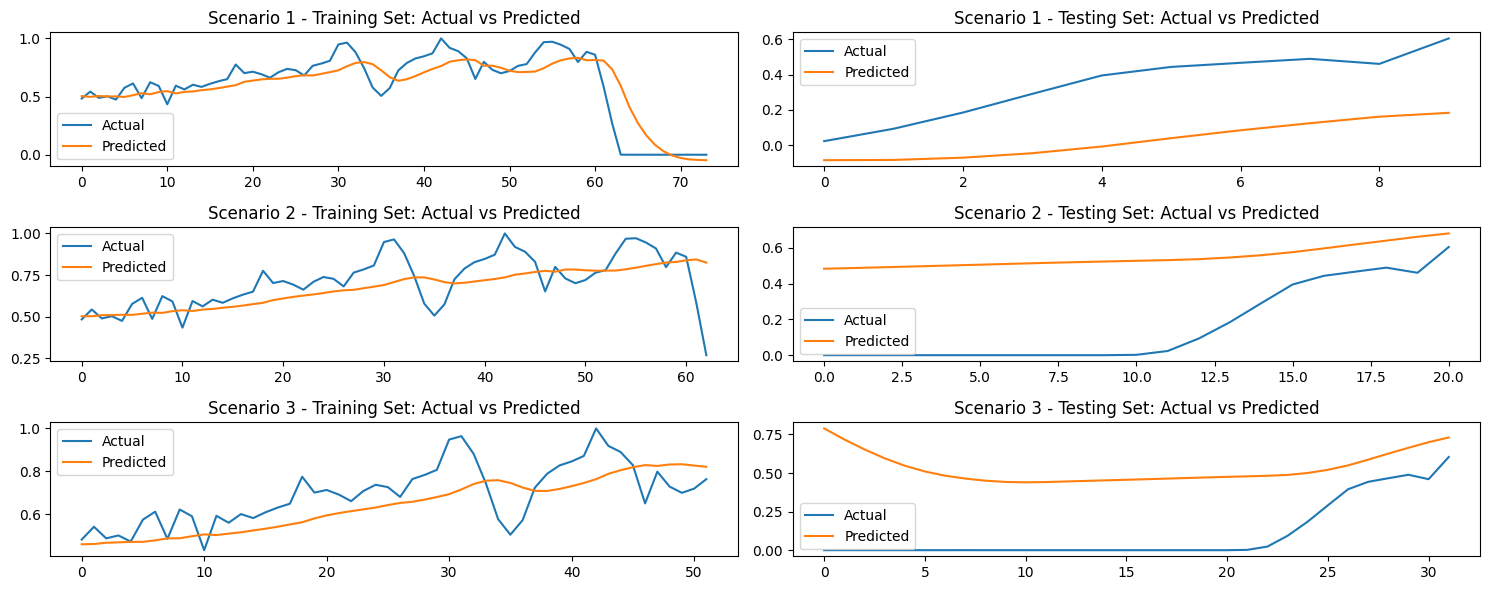

In [ ]:
# Grafik
plt.figure(figsize=(15, 6))

# Scenario 1
plt.subplot(3, 2, 1)
plt.plot(y_train_lstm_80, label='Actual')
plt.plot(y_train_pred_80, label='Predicted')
plt.title('Scenario 1 - Training Set: Actual vs Predicted')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(y_test_lstm_20, label='Actual')
plt.plot(y_test_pred_20, label='Predicted')
plt.title('Scenario 1 - Testing Set: Actual vs Predicted')
plt.legend()

# Scenario 2
plt.subplot(3, 2, 3)
plt.plot(y_train_lstm_70, label='Actual')
plt.plot(y_train_pred_70, label='Predicted')
plt.title('Scenario 2 - Training Set: Actual vs Predicted')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(y_test_lstm_30, label='Actual')
plt.plot(y_test_pred_30, label='Predicted')
plt.title('Scenario 2 - Testing Set: Actual vs Predicted')
plt.legend()

# Scenario 3
plt.subplot(3, 2, 5)
plt.plot(y_train_lstm_60, label='Actual')
plt.plot(y_train_pred_60, label='Predicted')
plt.title('Scenario 3 - Training Set: Actual vs Predicted')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(y_test_lstm_40, label='Actual')
plt.plot(y_test_pred_40, label='Predicted')
plt.title('Scenario 3 - Testing Set: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Fungsi untuk membuat input LSTM dengan faktor total_accomodation
def create_lstm_input_with_factor(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

#Definisi jumlah time steps untuk prediksi berikutnya
time_steps_future = 12

#Reshape data untuk LSTM dengan faktor total_accomodation
X_lstm_future, y_lstm_future = create_lstm_input_with_factor(features, time_steps_future)

#Reshape data untuk LSTM (Scenario 2)
#Menggunakan scenario 2 karena hasilnya paling baik
X_lstm_future_70 = np.reshape(X_lstm_future, (X_lstm_future.shape[0], X_lstm_future.shape[1], 2))

#Prediksi untuk 12 periode berikutnya (Scenario 2)
y_pred_future_70 = lstm_model_70.predict(X_lstm_future_70)

#Pastikan skalar yang digunakan untuk invers transformasi adalah skalar yang sama
inverse_transformed_data = scaler.inverse_transform(np.concatenate((y_pred_future_70, np.zeros((y_pred_future_70.shape[0], 1))), axis=1))

#Pilih kolom yang sesuai dengan 'total_visitor'
y_pred_future_70 = inverse_transformed_data[:, 0]

#Ambil hanya 12 data terakhir
predicted_12_periods = y_pred_future_70[-12:]

#Menampilkan hasil prediksi untuk 12 periode berikutnya (Scenario 2)
print("Prediksi Total Visitor untuk 12 Periode Berikutnya (Scenario 2):")
rounded_predictions = np.round(predicted_12_periods).astype(int)
print("Predictions:", rounded_predictions)

3/3 [==============================] - 0s 7ms/step
Prediksi Total Visitor untuk 12 Periode Berikutnya (Scenario 2):
Predictions: [326712 329069 331463 334867 340703 348651 359254 372389 386062 399468
 412897 424588]


# Forecast

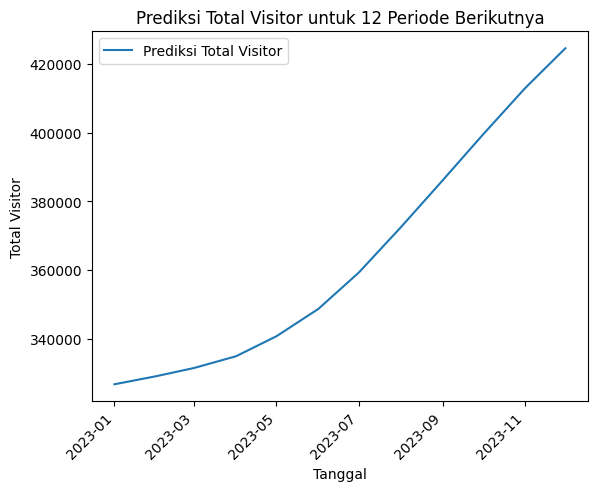

In [ ]:


# Data tanggal untuk sumbu x
dates = pd.date_range(start='2023-01-01', periods=len(predicted_12_periods), freq='MS')

# Ambil indeks untuk sumbu x
index = range(1, len(predicted_12_periods) + 1)

# Plot hasil prediksi
plt.plot(dates, predicted_12_periods, label='Prediksi Total Visitor')

# Atur label dan judul grafik
plt.xlabel('Tanggal')
plt.ylabel('Total Visitor')
plt.title('Prediksi Total Visitor untuk 12 Periode Berikutnya')

# Tampilkan legenda
plt.legend()

# Format sumbu x agar terlihat lebih baik (opsional)
plt.xticks(rotation=45, ha='right')

# Tampilkan grafik
plt.show()

# GRU

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

In [ ]:
#Membuat model GRU
def create_gru_model(input_shape, learning_rate=0.001):
    model = Sequential()
    model.add(GRU(64, input_shape=input_shape, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mae')
    return model

In [ ]:
# Scenario 1
input_shape = (X_train_lstm_80.shape[1], X_train_lstm_80.shape[2])

# Model Scenario 1 (80-20)
gru_model_80 = create_gru_model(input_shape)

# Scenario 2
input_shape = (X_train_lstm_70.shape[1], X_train_lstm_70.shape[2])

# Model Scenario 2 (70-30)
gru_model_70 = create_gru_model(input_shape)

# Scenario 3
input_shape = (X_train_lstm_60.shape[1], X_train_lstm_60.shape[2])

# Model Scenario 3 (60-40)
gru_model_60 = create_gru_model(input_shape)


In [ ]:
# Train the model
gru_model_80.fit(X_train_lstm_80, y_train_lstm_80, epochs=50, batch_size=32, validation_data=(X_test_lstm_20, y_test_lstm_20))


Epoch 1/50
3/3 [==============================] - 2s 150ms/step - loss: 0.5545 - val_loss: 0.2646
Epoch 2/50
3/3 [==============================] - 0s 22ms/step - loss: 0.5283 - val_loss: 0.2612
Epoch 3/50
3/3 [==============================] - 0s 25ms/step - loss: 0.5016 - val_loss: 0.2599
Epoch 4/50
3/3 [==============================] - 0s 22ms/step - loss: 0.4729 - val_loss: 0.2600
Epoch 5/50
3/3 [==============================] - 0s 24ms/step - loss: 0.4398 - val_loss: 0.2580
Epoch 6/50
3/3 [==============================] - 0s 23ms/step - loss: 0.4097 - val_loss: 0.2534
Epoch 7/50
3/3 [==============================] - 0s 22ms/step - loss: 0.3749 - val_loss: 0.2491
Epoch 8/50
3/3 [==============================] - 0s 22ms/step - loss: 0.3356 - val_loss: 0.2408
Epoch 9/50
3/3 [==============================] - 0s 24ms/step - loss: 0.2996 - val_loss: 0.2261
Epoch 10/50
3/3 [==============================] - 0s 22ms/step - loss: 0.2330 - val_loss: 0.2016
Epoch 11/50
3/3 [===========

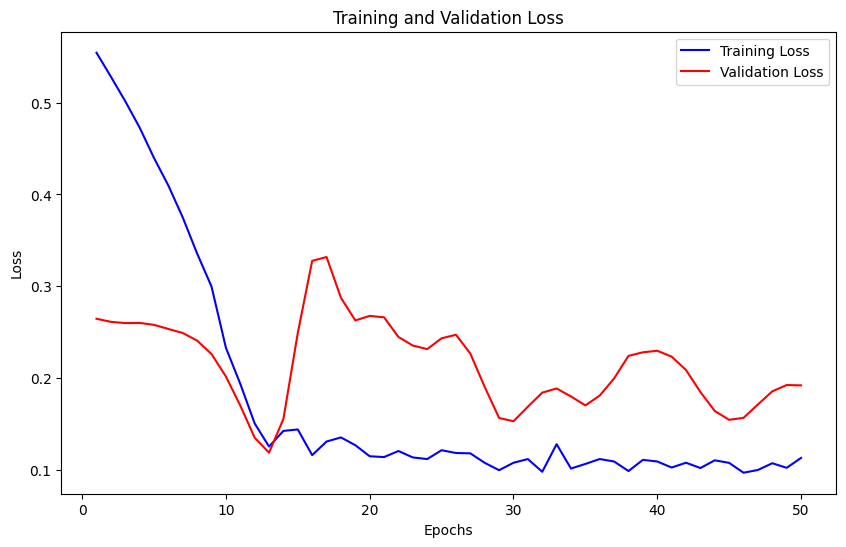

In [ ]:
# Plot training & validation loss values
gru_80_history = gru_model_80.history.history

# Extracting loss and validation loss values
gru_80_loss = gru_80_history['loss']
gru_80_val_loss = gru_80_history['val_loss']

epochs = range(1, len(gru_80_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))

plt.plot(epochs, gru_80_loss, 'b', label='Training Loss')
plt.plot(epochs, gru_80_val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
gru_train_loss_80 = gru_model_80.evaluate(X_train_lstm_80, y_train_lstm_80, verbose=0)
gru_test_loss_20 = gru_model_80.evaluate(X_test_lstm_20, y_test_lstm_20, verbose=0)
print(f"Train Loss (Scenario 1): {gru_train_loss_80}")
print(f"Test Loss (Scenario 1): {gru_test_loss_20}")

Train Loss (Scenario 1): 0.08083361387252808
Test Loss (Scenario 1): 0.19199000298976898


In [ ]:
# Train the model
gru_model_70.fit(X_train_lstm_70, y_train_lstm_70, epochs=50, batch_size=32, validation_data=(X_test_lstm_30, y_test_lstm_30))


Epoch 1/50
2/2 [==============================] - 0s 76ms/step - loss: 0.1068 - val_loss: 0.5099
Epoch 2/50
2/2 [==============================] - 0s 37ms/step - loss: 0.1062 - val_loss: 0.5021
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 0.1039 - val_loss: 0.4961
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.1032 - val_loss: 0.4938
Epoch 5/50
2/2 [==============================] - 0s 41ms/step - loss: 0.1066 - val_loss: 0.4937
Epoch 6/50
2/2 [==============================] - 0s 37ms/step - loss: 0.1122 - val_loss: 0.4972
Epoch 7/50
2/2 [==============================] - 0s 36ms/step - loss: 0.1122 - val_loss: 0.5017
Epoch 8/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0838 - val_loss: 0.5091
Epoch 9/50
2/2 [==============================] - 0s 36ms/step - loss: 0.1072 - val_loss: 0.5107
Epoch 10/50
2/2 [==============================] - 0s 36ms/step - loss: 0.1098 - val_loss: 0.5087
Epoch 11/50
2/2 [============

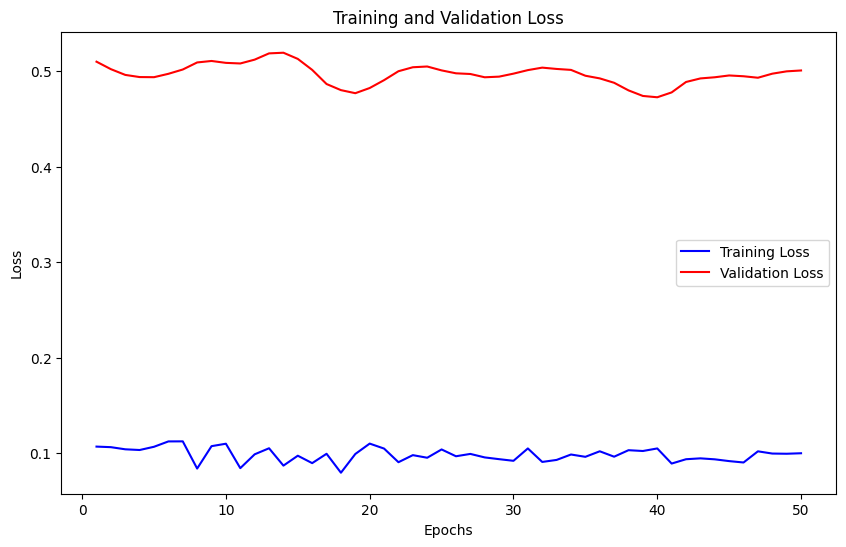

In [ ]:
# Plot training & validation loss values
gru_70_history = gru_model_70.history.history

# Extracting loss and validation loss values
gru_70_loss = gru_70_history['loss']
gru_70_val_loss = gru_70_history['val_loss']

epochs = range(1, len(gru_70_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))

plt.plot(epochs, gru_70_loss, 'b', label='Training Loss')
plt.plot(epochs, gru_70_val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
gru_train_loss_70 = gru_model_70.evaluate(X_train_lstm_70, y_train_lstm_70, verbose=0)
gru_test_loss_30 = gru_model_70.evaluate(X_test_lstm_30, y_test_lstm_30, verbose=0)
print(f"Train Loss (Scenario 2): {gru_train_loss_70}")
print(f"Test Loss (Scenario 2): {gru_test_loss_30}")

Train Loss (Scenario 2): 0.07402801513671875
Test Loss (Scenario 2): 0.5007038712501526


In [ ]:
# Train the model
gru_model_60.fit(X_train_lstm_60, y_train_lstm_60, epochs=50, batch_size=32, validation_data=(X_test_lstm_40, y_test_lstm_40))


Epoch 1/50
2/2 [==============================] - 0s 108ms/step - loss: 0.0818 - val_loss: 0.4132
Epoch 2/50
2/2 [==============================] - 0s 68ms/step - loss: 0.0932 - val_loss: 0.4177
Epoch 3/50
2/2 [==============================] - 0s 50ms/step - loss: 0.0916 - val_loss: 0.4201
Epoch 4/50
2/2 [==============================] - 0s 62ms/step - loss: 0.0948 - val_loss: 0.4198
Epoch 5/50
2/2 [==============================] - 0s 50ms/step - loss: 0.1124 - val_loss: 0.4186
Epoch 6/50
2/2 [==============================] - 0s 54ms/step - loss: 0.1039 - val_loss: 0.4203
Epoch 7/50
2/2 [==============================] - 0s 56ms/step - loss: 0.0822 - val_loss: 0.4216
Epoch 8/50
2/2 [==============================] - 0s 67ms/step - loss: 0.0912 - val_loss: 0.4255
Epoch 9/50
2/2 [==============================] - 0s 49ms/step - loss: 0.0834 - val_loss: 0.4289
Epoch 10/50
2/2 [==============================] - 0s 70ms/step - loss: 0.0942 - val_loss: 0.4270
Epoch 11/50
2/2 [===========

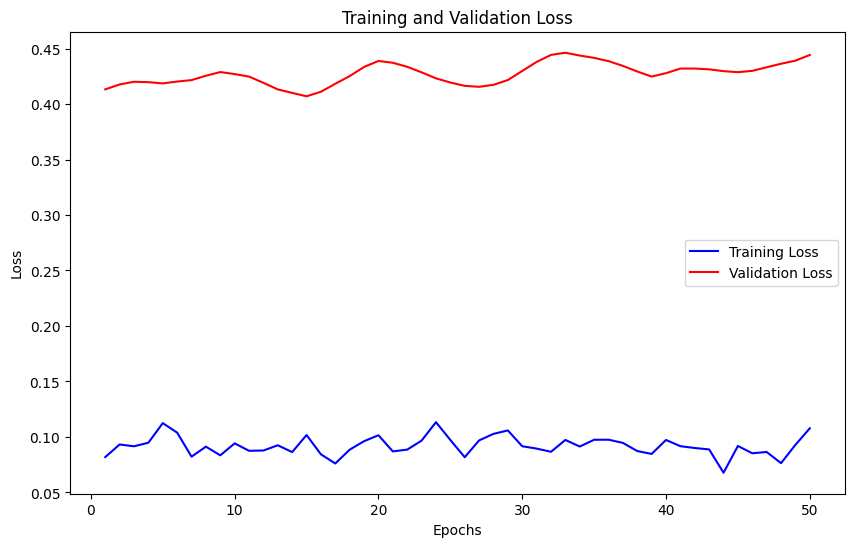

In [ ]:
# Plot training & validation loss values
gru_60_history = gru_model_60.history.history

# Extracting loss and validation loss values
gru_60_loss = gru_60_history['loss']
gru_60_val_loss = gru_60_history['val_loss']

epochs = range(1, len(gru_60_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))

plt.plot(epochs, gru_60_loss, 'b', label='Training Loss')
plt.plot(epochs, gru_60_val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
gru_train_loss_60 = gru_model_60.evaluate(X_train_lstm_60, y_train_lstm_60, verbose=0)
gru_test_loss_40 = gru_model_60.evaluate(X_test_lstm_40, y_test_lstm_40, verbose=0)
print(f"Train Loss (Scenario 3): {gru_train_loss_60}")
print(f"Test Loss (Scenario 3): {gru_test_loss_40}")

Train Loss (Scenario 3): 0.06687743216753006
Test Loss (Scenario 3): 0.4442444145679474


In [ ]:
# Prediksi untuk train set dan test set
y_train_pred_80 = gru_model_80.predict(X_train_lstm_80)
y_test_pred_20 = gru_model_80.predict(X_test_lstm_20)

y_train_pred_70 = gru_model_70.predict(X_train_lstm_70)
y_test_pred_30 = gru_model_70.predict(X_test_lstm_30)

y_train_pred_60 = gru_model_60.predict(X_train_lstm_60)
y_test_pred_40 = gru_model_60.predict(X_test_lstm_40)


1/1 [==============================] - 0s 21ms/step


In [ ]:
# Scenario 1

gru_mse_train_80, gru_mape_train_80, gru_mae_train_80 = evaluate_forecast(y_train_lstm_80, y_train_pred_80)
gru_mse_test_20, gru_mape_test_20, gru_mae_test_20 = evaluate_forecast(y_test_lstm_20, y_test_pred_20)
print("Scenario 1")
print("Train MSE:", gru_mse_train_80)
print("Test MSE:", gru_mse_test_20)
print("Train MAPE:", gru_mape_train_80)
print("Test MAPE:", gru_mape_test_20)
print("Train MAE:", gru_mae_train_80)
print("Test MAE:", gru_mae_test_20)

Scenario 1
Train MSE: 0.013895243018540789
Test MSE: 0.04103132680362194
Train MAPE: 0.2801563031146049
Test MAPE: 0.25509726888702533
Train MAE: 0.08083360929108098
Test MAE: 0.19198999750185744


In [ ]:
# Scenario 2

gru_mse_train_70, gru_mape_train_70, gru_mae_train_70 = evaluate_forecast(y_train_lstm_70, y_train_pred_70)
gru_mse_test_30, gru_mape_test_30, gru_mae_test_30 = evaluate_forecast(y_test_lstm_30, y_test_pred_30)
print("Scenario 2")
print("Train MSE:", gru_mse_train_70)
print("Test MSE:", gru_mse_test_30)
print("Train MAPE:", gru_mape_train_70)
print("Test MAPE:", gru_mape_test_30)
print("Train MAE:", gru_mae_train_70)
print("Test MAE:", gru_mae_test_30)

Scenario 2
Train MSE: 0.012978321876610919
Test MSE: 0.2644926647753636
Train MAPE: 0.15681335408670632
Test MAPE: 0.5012839757122822
Train MAE: 0.07402801241153205
Test MAE: 0.5007038504312227


In [ ]:
# Scenario 3

gru_mse_train_60, gru_mape_train_60, gru_mae_train_60 = evaluate_forecast(y_train_lstm_60, y_train_pred_60)
gru_mse_test_40, gru_mape_test_40, gru_mae_test_40 = evaluate_forecast(y_test_lstm_40, y_test_pred_40)
print("Scenario 3")
print("Train MSE:", gru_mse_train_70)
print("Test MSE:", gru_mse_test_30)
print("Train MAPE:", gru_mape_train_70)
print("Test MAPE:", gru_mape_test_30)
print("Train MAE:", gru_mae_train_70)
print("Test MAE:", gru_mae_test_30)

Scenario 3
Train MSE: 0.012978321876610919
Test MSE: 0.2644926647753636
Train MAPE: 0.15681335408670632
Test MAPE: 0.5012839757122822
Train MAE: 0.07402801241153205
Test MAE: 0.5007038504312227


In [ ]:
# Tabel
# Data untuk rekapitulasi hasil forecasting
data = {
    'Scenario': ['Scenario 1', 'Scenario 2', 'Scenario 3'],
    'Train MSE': [gru_mse_train_80, mse_train_70, gru_mse_train_60],
    'Test MSE': [gru_mse_test_20, gru_mse_test_30, gru_mse_test_40],
    'Train MAPE': [gru_mape_train_80, gru_mape_train_70, gru_mape_train_60],
    'Test MAPE': [gru_mape_test_20, gru_mape_test_30, gru_mape_test_40],
    'Train MAE': [gru_mae_train_80, gru_mae_train_70, gru_mae_train_60],
    'Test MAE': [gru_mae_test_20, gru_mae_test_30, gru_mae_test_40],
}

# Membuat dataframe
df_results = pd.DataFrame(data)

# Menampilkan rekapitulasi hasil forecasting
print("Rekapitulasi Hasil Forecasting:")
print(df_results)

Rekapitulasi Hasil Forecasting:
     Scenario  Train MSE  Test MSE  Train MAPE  Test MAPE  Train MAE  Test MAE
0  Scenario 1   0.013895  0.041031    0.280156   0.255097   0.080834  0.191990
1  Scenario 2   0.017933  0.264493    0.156813   0.501284   0.074028  0.500704
2  Scenario 3   0.007897  0.210705    0.133775   0.448684   0.066877  0.444244


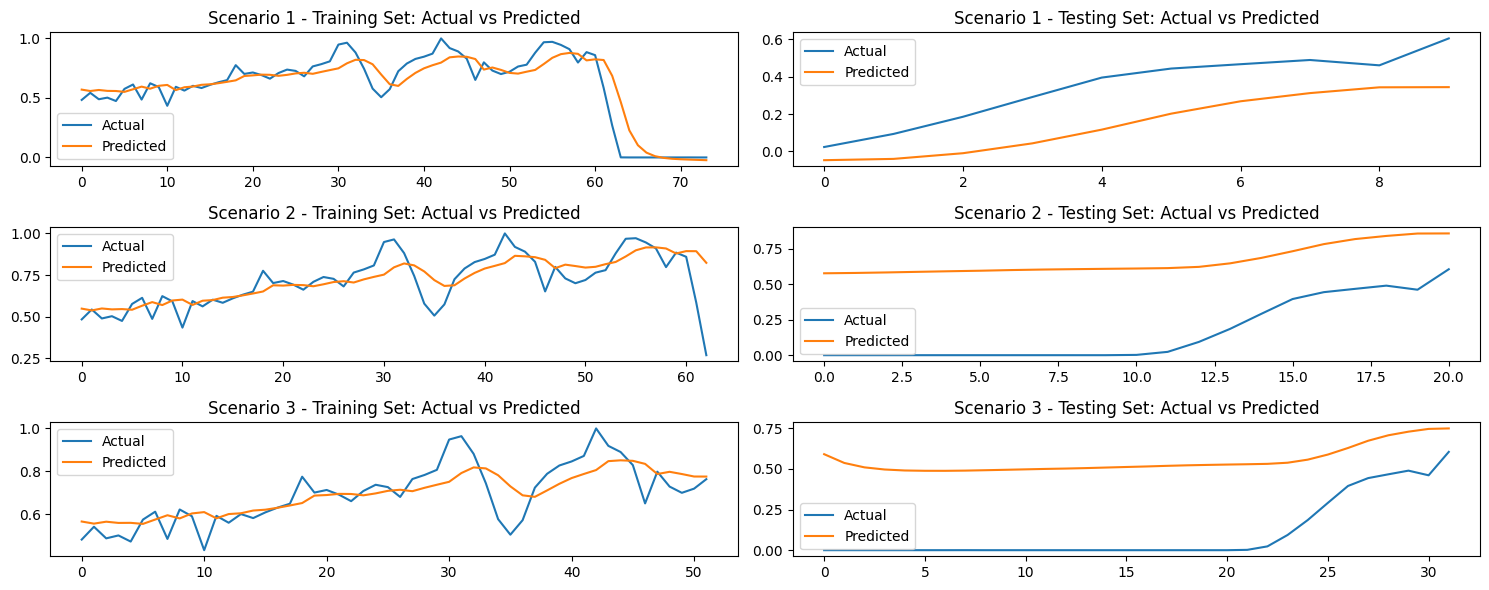

In [ ]:
# Grafik
plt.figure(figsize=(15, 6))

# Scenario 1
plt.subplot(3, 2, 1)
plt.plot(y_train_lstm_80, label='Actual')
plt.plot(y_train_pred_80, label='Predicted')
plt.title('Scenario 1 - Training Set: Actual vs Predicted')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(y_test_lstm_20, label='Actual')
plt.plot(y_test_pred_20, label='Predicted')
plt.title('Scenario 1 - Testing Set: Actual vs Predicted')
plt.legend()

# Scenario 2
plt.subplot(3, 2, 3)
plt.plot(y_train_lstm_70, label='Actual')
plt.plot(y_train_pred_70, label='Predicted')
plt.title('Scenario 2 - Training Set: Actual vs Predicted')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(y_test_lstm_30, label='Actual')
plt.plot(y_test_pred_30, label='Predicted')
plt.title('Scenario 2 - Testing Set: Actual vs Predicted')
plt.legend()

# Scenario 3
plt.subplot(3, 2, 5)
plt.plot(y_train_lstm_60, label='Actual')
plt.plot(y_train_pred_60, label='Predicted')
plt.title('Scenario 3 - Training Set: Actual vs Predicted')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(y_test_lstm_40, label='Actual')
plt.plot(y_test_pred_40, label='Predicted')
plt.title('Scenario 3 - Testing Set: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Fungsi untuk membuat input GRU dengan faktor total_accomodation
def create_gru_input_with_factor(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

#Definisi jumlah time steps untuk prediksi berikutnya
time_steps_future = 12

#Reshape data untuk GRU dengan faktor total_accomodation
X_gru_future, y_gru_future = create_gru_input_with_factor(features, time_steps_future)

#Reshape data untuk GRU (Scenario 2)
#Menggunakan scenario 2 karena hasilnya paling baik
X_gru_future_80 = np.reshape(X_gru_future, (X_gru_future.shape[0], X_gru_future.shape[1], 2))

#Prediksi untuk 12 periode berikutnya (Scenario 2) menggunakan GRU model 80
y_pred_future_80 = gru_model_80.predict(X_gru_future_80)

#Pastikan skalar yang digunakan untuk invers transformasi adalah skalar yang sama
inverse_transformed_data = scaler.inverse_transform(np.concatenate((y_pred_future_80, np.zeros((y_pred_future_80.shape[0], 1))), axis=1))

#Pilih kolom yang sesuai dengan 'total_visitor'
y_pred_future_80 = inverse_transformed_data[:, 0]

#Ambil hanya 12 data terakhir
predicted_12_periods = y_pred_future_80[-12:]

#Menampilkan hasil prediksi untuk 12 periode berikutnya (Scenario 2) menggunakan GRU model 80
print("Prediksi Total Visitor untuk 12 Periode Berikutnya (Scenario 2 - GRU Model 80):")
rounded_predictions = np.round(predicted_12_periods).astype(int)
print("Predictions:", rounded_predictions)


3/3 [==============================] - 0s 5ms/step
Prediksi Total Visitor untuk 12 Periode Berikutnya (Scenario 2 - GRU Model 80):
Predictions: [-28355 -29113 -29364 -25037  -6074  26864  72694 126026 167369 194665
 213984 214588]


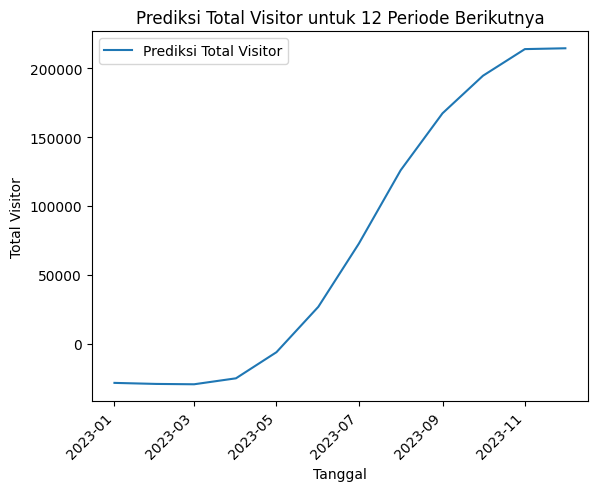

In [ ]:

# Data tanggal untuk sumbu x
dates = pd.date_range(start='2023-01-01', periods=len(predicted_12_periods), freq='MS')

# Ambil indeks untuk sumbu x
index = range(1, len(predicted_12_periods) + 1)

# Plot hasil prediksi
plt.plot(dates, predicted_12_periods, label='Prediksi Total Visitor')

# Atur label dan judul grafik
plt.xlabel('Tanggal')
plt.ylabel('Total Visitor')
plt.title('Prediksi Total Visitor untuk 12 Periode Berikutnya')

# Tampilkan legenda
plt.legend()

# Format sumbu x agar terlihat lebih baik (opsional)
plt.xticks(rotation=45, ha='right')

# Tampilkan grafik
plt.show()